# Introduction to Deep Learning - Neural Networks Basics

## Learning Objectives
- Understand basic concepts of neural networks
- Learn about perceptrons and their components
- Implement basic logical operations using perceptrons
- Discover limitations of single-layer networks through the XOR problem

## What is Deep Learning?

Deep learning is a subset of machine learning that uses artificial neural networks inspired by the human brain. The 'deep' refers to the multiple layers in these networks.

A neural network consists of:
1. Input layer
2. Hidden layer(s)
3. Output layer

Each layer contains nodes (neurons) that process information and pass it to the next layer.

## The McCulloch-Pitts Neuron

The basic building block of neural networks is the McCulloch-Pitts neuron, which has three components:

1. Weights (w₁, w₂, ..., wₙ) corresponding to synapses
2. An adder for summing input signals
3. An activation function for determining neuron firing

The mathematical representation is:
h = Σᵢ wᵢxᵢ

where h is the weighted sum and wᵢ are the weights for inputs xᵢ.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from IPython.display import display

## Understanding Logical Operations

We'll start by implementing basic logical operations (AND, OR) using a perceptron. These are fundamental building blocks for more complex operations.

In [2]:
# Create truth tables for logical operations
AND = pd.DataFrame({'x1': (0,0,1,1), 
                    'x2': (0,1,0,1), 
                    'y': (0,0,0,1)})
print("AND Truth Table:")
display(AND)

AND Truth Table:


,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [9]:
# Create truth tables for logical OR operation
OR = pd.DataFrame({'x1': (0, 0, 1, 1),
                   'x2': (0, 1, 0, 1),
                   'y': (0, 1, 1, 1)})
print("OR Truth Table:")
display(OR)

OR Truth Table:


,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [3]:
# Define our activation function
def g(inputs, weights):
    """Simple threshold activation function"""
    return np.where(np.dot(inputs, weights) > 0, 1, 0)

# Define training function
def train(inputs, targets, weights, eta, n_iterations):
    """Train the perceptron
    
    Parameters:
    inputs: input data
    targets: target values
    weights: initial weights
    eta: learning rate
    n_iterations: number of training iterations
    """
    # Add bias input
    inputs = np.c_[inputs, -np.ones((len(inputs), 1))]
    
    for n in range(n_iterations):
        activations = g(inputs, weights)
        weights -= eta * np.dot(np.transpose(inputs), activations - targets)
    
    return weights

In [4]:
# Initialize weights and train for AND function
w = np.random.randn(3) * 1e-4  # Small random initial weights
inputs = AND[['x1','x2']]
target = AND['y']

# Train the perceptron
w = train(inputs, target, w, 0.25, 10)

# Test the perceptron
print("\nTesting AND function:")
result = g(np.c_[inputs, -np.ones((len(inputs), 1))], w)
print(result)


Testing AND function:
[0 0 0 1]


## Assignment: The XOR Problem

Now it's your turn! The XOR (exclusive OR) function returns 1 when inputs are different, and 0 when they are the same.

Your tasks:

1. Create the truth table for XOR
2. Try to train a perceptron to learn XOR
3. Analyze the results
4. Explain why the perceptron succeeds or fails

In [5]:
# Your code here
# Create XOR truth table
XOR = pd.DataFrame({'x1': (0,0,1,1), 
                    'x2': (0,1,0,1), 
                    'y': (0,1,1,0)})
print("XOR Truth Table:")
display(XOR)

# Train a perceptron for XOR
# Your implementation here

XOR Truth Table:


,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


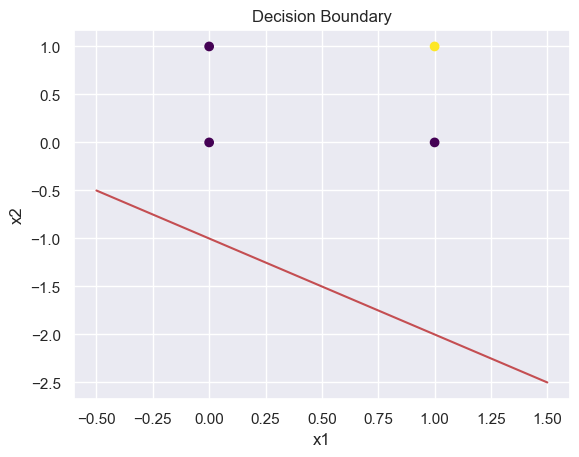

In [6]:
import matplotlib.pyplot as plt

def plot_decision_boundary(inputs, targets, weights):
    plt.scatter(inputs[:, 0], inputs[:, 1], c=targets, cmap='viridis')
    x = np.linspace(-0.5, 1.5, 100)
    y = -(weights[0] * x + weights[2]) / weights[1]
    plt.plot(x, y, '-r')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Decision Boundary')
    plt.show()

# Example usage:
plot_decision_boundary(np.c_[inputs, -np.ones((len(inputs), 1))], target, w)

### Questions to Answer:

1. What happens when you try to train the perceptron on XOR?
2. Why does this happen? (Hint: Think about linear separability)
3. How could you modify the network to successfully implement XOR?
4. What does this tell us about the limitations of single-layer perceptrons?

Write your answers and analysis below:

## Your Analysis
[Write your analysis here]